In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
1

1

In [3]:
train_x = torch.linspace(0, 1, 100)

train_y = torch.stack([
    torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2,
    torch.cos(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2,
], -1)

In [4]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=2
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.RBFKernel(), num_tasks=2, rank=1
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)


likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2)
model = MultitaskGPModel(train_x, train_y, likelihood)



In [5]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iterations = 2 if smoke_test else 50


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iterations, loss.item()))
    optimizer.step()

Iter 1/50 - Loss: 1.209
Iter 2/50 - Loss: 1.171
Iter 3/50 - Loss: 1.133
Iter 4/50 - Loss: 1.094
Iter 5/50 - Loss: 1.056
Iter 6/50 - Loss: 1.017
Iter 7/50 - Loss: 0.977
Iter 8/50 - Loss: 0.936
Iter 9/50 - Loss: 0.894
Iter 10/50 - Loss: 0.853
Iter 11/50 - Loss: 0.812
Iter 12/50 - Loss: 0.774
Iter 13/50 - Loss: 0.735
Iter 14/50 - Loss: 0.697
Iter 15/50 - Loss: 0.658
Iter 16/50 - Loss: 0.618
Iter 17/50 - Loss: 0.578
Iter 18/50 - Loss: 0.537
Iter 19/50 - Loss: 0.495
Iter 20/50 - Loss: 0.454
Iter 21/50 - Loss: 0.413
Iter 22/50 - Loss: 0.373
Iter 23/50 - Loss: 0.335
Iter 24/50 - Loss: 0.297
Iter 25/50 - Loss: 0.261
Iter 26/50 - Loss: 0.227
Iter 27/50 - Loss: 0.193
Iter 28/50 - Loss: 0.161
Iter 29/50 - Loss: 0.130
Iter 30/50 - Loss: 0.100
Iter 31/50 - Loss: 0.072
Iter 32/50 - Loss: 0.047
Iter 33/50 - Loss: 0.024
Iter 34/50 - Loss: 0.004
Iter 35/50 - Loss: -0.014
Iter 36/50 - Loss: -0.029
Iter 37/50 - Loss: -0.042
Iter 38/50 - Loss: -0.052
Iter 39/50 - Loss: -0.060
Iter 40/50 - Loss: -0.066
Ite

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/linear_operator/utils/interpolation.py:71: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /opt/conda/conda-bld/pytorch_1695391896228/work/torch/csrc/utils/tensor_new.cpp:605.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)


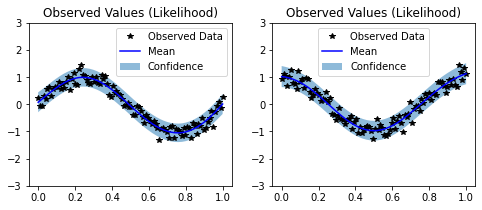

In [6]:
# Set into eval mode
model.eval()
likelihood.eval()

# Initialize plots
f, (y1_ax, y2_ax) = plt.subplots(1, 2, figsize=(8, 3))

# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(0, 1, 51)
    predictions = likelihood(model(test_x))
    mean = predictions.mean
    lower, upper = predictions.confidence_region()

# This contains predictions for both tasks, flattened out
# The first half of the predictions is for the first task
# The second half is for the second task

# Plot training data as black stars
y1_ax.plot(train_x.detach().numpy(), train_y[:, 0].detach().numpy(), 'k*')
# Predictive mean as blue line
y1_ax.plot(test_x.numpy(), mean[:, 0].numpy(), 'b')
# Shade in confidence
y1_ax.fill_between(test_x.numpy(), lower[:, 0].numpy(), upper[:, 0].numpy(), alpha=0.5)
y1_ax.set_ylim([-3, 3])
y1_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y1_ax.set_title('Observed Values (Likelihood)')

# Plot training data as black stars
y2_ax.plot(train_x.detach().numpy(), train_y[:, 1].detach().numpy(), 'k*')
# Predictive mean as blue line
y2_ax.plot(test_x.numpy(), mean[:, 1].numpy(), 'b')
# Shade in confidence
y2_ax.fill_between(test_x.numpy(), lower[:, 1].numpy(), upper[:, 1].numpy(), alpha=0.5)
y2_ax.set_ylim([-3, 3])
y2_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y2_ax.set_title('Observed Values (Likelihood)')

None



In [7]:
import jax.numpy as jnp
import numpyro
import numpyro,distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive




ModuleNotFoundError: No module named 'distributions'

In [ ]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
import numpy as np
import matplotlib.pyplot as plt
# import arviz as az

# Example data in the range [-1, 1]
data = sim_val#beg_end_same#sim_val#end_beg
# Transform data to be in [0, 1]
transformed_data = (data + 1) / 2
rng_key = jax.random.PRNGKey(0)
def model(y):
    # Priors
    alpha = numpyro.sample('alpha', dist.Uniform(0, 20))
    beta = numpyro.sample('beta', dist.Uniform(0, 20))
    
    # Likelihood
    numpyro.sample('y_obs', dist.Beta(alpha, beta), obs=y)

# Run MCMC
kernel = NUTS(model)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=1)
mcmc.run(rng_key, transformed_data)

# Extract samples
samples = mcmc.get_samples()

# Summary
mcmc.print_summary()

# Plot
# az.plot_trace(mcmc, var_names=["alpha", "beta"])
# plt.show()


In [ ]:
samples=mcmc.get_samples()
predictive = Predictive(model, posterior_samples=samples)

# Sample from the posterior predictive
rng_key = jax.random.PRNGKey(1)
posterior_predictive = predictive(rng_key, y=None,)

xs=np.linspace(0,1,100)
a =np.mean(samples['alpha'])
b = np.mean(samples['beta'])
beta_pdf_fit=scipy.stats.beta(a=a,b=b).pdf(np.linspace(0,1,100))

plt.hist(transformed_data,density=True,bins=30)
plt.hist(posterior_predictive['y_obs'],alpha=0.2,density=True,bins=30)
plt.plot(xs,beta_pdf_fit)

In [ ]:
import time
from numpyro.infer import (
    MCMC,
    NUTS,
    init_to_feasible,
    init_to_median,
    init_to_sample,
    init_to_uniform,
    init_to_value,
)

# squared exponential kernel with diagonal noise term
def kernel(X, Z, var, length, noise, jitter=1.0e-6, include_noise=True):
    deltaXsq = jnp.power((X[:, None] - Z) / length, 2.0)
    k = var * jnp.exp(-0.5 * deltaXsq)
    if include_noise:
        k += (noise + jitter) * jnp.eye(X.shape[0])
    return k

def model(X, Y):
    # set uninformative log-normal priors on our three kernel hyperparameters
    var = numpyro.sample("kernel_var", dist.LogNormal(0.0, 10.0))
    noise = numpyro.sample("kernel_noise", dist.LogNormal(0.0, 10.0))
    length = numpyro.sample("kernel_length", dist.LogNormal(0.0, 10.0))

    # compute kernel
    k = kernel(X, X, var, length, noise)

    # sample Y according to the standard gaussian process formula
    numpyro.sample(
        "Y",
        dist.MultivariateNormal(loc=jnp.zeros(X.shape[0]), covariance_matrix=k),
        obs=Y,
    )
    
#     Likelihood
#     numpyro.sample("y", dist.Normal("Y", 0.1), obs=Y)
    

# helper function for doing hmc inference
def run_inference(model, rng_key, X, Y,init_strategy='median',num_warmup=500,num_samples=1000,num_chains=1,thinning=2):
    start = time.time()
    # demonstrate how to use different HMC initialization strategies
    if init_strategy == "value":
        init_strategy = init_to_value(
            values={"kernel_var": 1.0, "kernel_noise": 0.05, "kernel_length": 0.5}
        )
    elif init_strategy == "median":
        init_strategy = init_to_median(num_samples=10)
    elif init_strategy == "feasible":
        init_strategy = init_to_feasible()
    elif init_strategy == "sample":
        init_strategy = init_to_sample()
    elif init_strategy == "uniform":
        init_strategy = init_to_uniform(radius=1)
    kernel = NUTS(model, init_strategy=init_strategy)
    mcmc = MCMC(
        kernel,
        num_warmup=num_warmup,
        num_samples=num_samples,
        num_chains=num_chains,
        thinning=thinning,
        progress_bar=False if "NUMPYRO_SPHINXBUILD" in os.environ else True,
    )
    mcmc.run(rng_key, X, Y)
    mcmc.print_summary()
    print("\nMCMC elapsed time:", time.time() - start)
    return mcmc.get_samples()

# do GP prediction for a given set of hyperparameters. this makes use of the well-known
# formula for gaussian process predictions
def predict(rng_key, X, Y, X_test, var, length, noise):
    # compute kernels between train and test data, etc.
    k_pp = kernel(X_test, X_test, var, length, noise, include_noise=True)
    k_pX = kernel(X_test, X, var, length, noise, include_noise=False)
    k_XX = kernel(X, X, var, length, noise, include_noise=True)
    K_xx_inv = jnp.linalg.inv(k_XX)
    K = k_pp - jnp.matmul(k_pX, jnp.matmul(K_xx_inv, jnp.transpose(k_pX)))
    sigma_noise = jnp.sqrt(jnp.clip(jnp.diag(K), a_min=0.0)) * jax.random.normal(
        rng_key, X_test.shape[:1]
    )
    mean = jnp.matmul(k_pX, jnp.matmul(K_xx_inv, Y))
    # we return both the mean function and a sample from the posterior predictive for the
    # given set of hyperparameters
    return mean, mean + sigma_noise

# create artificial regression dataset
def get_data(N=30, sigma_obs=0.15, N_test=400):
    np.random.seed(0)
    X = jnp.linspace(-1, 1, N)
    Y = X + 0.2 * jnp.power(X, 3.0) + 0.5 * jnp.power(0.5 + X, 2.0) * jnp.sin(4.0 * X)
    Y += sigma_obs * np.random.randn(N)
    Y -= jnp.mean(Y)
    Y /= jnp.std(Y)

    assert X.shape == (N,)
    assert Y.shape == (N,)

    X_test = jnp.linspace(-1.3, 1.3, N_test)

    return X, Y, X_test


In [ ]:
X = jnp.array(end_i.index)
X = jnp.tile(X,(end_i.shape[1],))
X_test=X
# Y = jnp.array(end_i.values).T
Y = jnp.array(end_i.values).reshape(-1,order='F')
rng_key, rng_key_predict = random.split(random.PRNGKey(0))
samples = run_inference(model, rng_key, X, Y,init_strategy='uniform')
X_test=jnp.linspace(X.min(),X.max(),200)

In [ ]:
from jax import vmap
vmap_args = (
        random.split(rng_key_predict, samples["kernel_var"].shape[0]),
        samples["kernel_var"],
        samples["kernel_length"],
        samples["kernel_noise"],
    )
means, predictions = vmap(
    lambda rng_key, var, length, noise: predict(
        rng_key, X, Y, X_test, var, length, noise
    )
)(*vmap_args)
mean_prediction = np.mean(means, axis=0)
percentiles = np.percentile(predictions, [5.0, 95.0], axis=0)

In [ ]:
# make plots
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# plot training data
# for i in range(Y.shape[0]):
#     ax.plot(X, Y[i,:], "kx")
ax.plot(X,Y,"kx")
# plot 90% confidence level of predictions
ax.fill_between(X_test, percentiles[0, :], percentiles[1, :], color="lightblue")
# plot mean prediction
ax.plot(X_test, mean_prediction, "blue", ls="solid", lw=2.0)
ax.set(xlabel="X", ylabel="Y", title="Mean predictions with 90% CI")